In [165]:
import pandas as pd

In [166]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [167]:
df = pd.read_parquet(r"../../../data/NowayKR.parquet")

In [168]:
df.shape

(637, 215)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637 entries, EUW1_6694655020 to EUW1_6234574716
Columns: 215 entries, gameCreation to session
dtypes: bool(13), datetime64[ns](2), float64(150), int64(23), object(26), timedelta64[ns](1)
memory usage: 1018.3+ KB


In [170]:
df.tail()

,gameCreation,gameEndTimestamp,gameDuration,gameVersion,kills,deaths,assists,championName,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,magicDamageDealtToChampions,physicalDamageDealtToChampions,teamEarlySurrendered,teamPosition,totalDamageDealtToChampions,wardsKilled,wardsPlaced,win,teamId,allyTopPick,allyJunglePick,allyMiddlePick,allyBottomPick,allySupportPick,enemyTopPick,enemyJunglePick,enemyMiddlePick,enemyBottomPick,enemySupportPick,laneOpponent,allyTopBan,allyJungleBan,allyMiddleBan,allyBottomBan,allySupportBan,enemyTopBan,enemyJungleBan,enemyMiddleBan,enemyBottomBan,enemySupportBan,Maxi,Moritz,Niclas,Aaron,totalAllyTeamKills,totalAllyTeamDeaths,gold@0,gold@1,gold@2,gold@3,gold@4,gold@5,gold@6,gold@7,gold@8,gold@9,gold@10,gold@11,gold@12,gold@13,gold@14,gold@15,gold@16,gold@17,gold@18,gold@19,gold@20,gold@21,gold@22,gold@23,gold@24,gold@25,gold@26,gold@27,gold@28,gold@29,gold@30,gold_diff@0,gold_diff@1,gold_diff@2,gold_diff@3,gold_diff@4,gold_diff@5,gold_diff@6,gold_diff@7,gold_diff@8,gold_diff@9,gold_diff@10,gold_diff@11,gold_diff@12,gold_diff@13,gold_diff@14,gold_diff@15,gold_diff@16,gold_diff@17,gold_diff@18,gold_diff@19,gold_diff@20,gold_diff@21,gold_diff@22,gold_diff@23,gold_diff@24,gold_diff@25,gold_diff@26,gold_diff@27,gold_diff@28,gold_diff@29,gold_diff@30,cs@0,cs@1,cs@2,cs@3,cs@4,cs@5,cs@6,cs@7,cs@8,cs@9,cs@10,cs@11,cs@12,cs@13,cs@14,cs@15,cs@16,cs@17,cs@18,cs@19,cs@20,cs@21,cs@22,cs@23,cs@24,cs@25,cs@26,cs@27,cs@28,cs@29,cs@30,puuid,gold@31,gold@32,gold@33,gold@34,gold@35,gold@36,gold@37,gold_diff@31,gold_diff@32,gold_diff@33,gold_diff@34,gold_diff@35,gold_diff@36,gold_diff@37,cs@31,cs@32,cs@33,cs@34,cs@35,cs@36,cs@37,gold@38,gold@39,gold_diff@38,gold_diff@39,cs@38,cs@39,gold@40,gold@41,gold@42,gold@43,gold_diff@40,gold_diff@41,gold_diff@42,gold_diff@43,cs@40,cs@41,cs@42,cs@43,gold@44,gold@45,gold_diff@44,gold_diff@45,cs@44,cs@45,gold@46,gold@47,gold@48,gold@49,gold@50,gold@51,gold@52,gold_diff@46,gold_diff@47,gold_diff@48,gold_diff@49,gold_diff@50,gold_diff@51,gold_diff@52,cs@46,cs@47,cs@48,cs@49,cs@50,cs@51,cs@52,gameDuration_m_s,onBlueSide,timeBetweenGames,session
matchId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EUW1_6235236083,2023-01-16 15:10:51,2023-01-16 15:46:09,2094,13.1,8,9,9,Viktor,False,False,False,False,False,False,15923,39270,716,False,MIDDLE,42315,7,12,False,100,KSante,MasterYi,Viktor,Kaisa,Amumu,Malphite,RekSai,Orianna,Varus,Renata,Orianna,Draven,MonkeyKing,Kassadin,Elise,Jax,Nami,Zac,Kassadin,Sylas,Heimerdinger,False,False,False,False,31,45,500,500,570,825.0,1211.0,1732.0,1972.0,2319.0,2971.0,3248.0,3565.0,4021.0,4696.0,5352.0,5814.0,5964.0,6412.0,7242.0,7565.0,7994.0,8235.0,9110.0,9595.0,10541.0,11045.0,11380.0,11952.0,12376.0,12999.0,13776.0,13899.0,0,0,-37,-69.0,82.0,241.0,135.0,176.0,424.0,389.0,356.0,535.0,744.0,918.0,1030.0,855.0,1065.0,1246.0,1041.0,90.0,-86.0,338.0,596.0,1251.0,1528.0,1248.0,1642.0,1644.0,1880.0,1168.0,1168.0,0,0,2,10.0,23.0,26.0,32.0,46.0,52.0,58.0,68.0,79.0,88.0,93.0,107.0,108.0,121.0,138.0,146.0,146.0,147.0,152.0,157.0,161.0,180.0,180.0,180.0,193.0,210.0,218.0,218.0,Ojis3-jBDzeNHW325uynG8LlhWw5E1QqujrzHQy_w8GiFG...,14092.0,14614.0,14737.0,15460.0,15923.0,NaN,NaN,1224.0,1434.0,851.0,890.0,931.0,NaN,NaN,222.0,223.0,223.0,238.0,240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34:54,True,0 days 00:08:51,104
EUW1_6235185363,2023-01-16 14:32:48,2023-01-16 15:01:34,1650,13.1,4,10,6,Gangplank,False,False,False,False,False,False,11660,4656,15868,False,TOP,25330,0,10,False,100,Gangplank,Maokai,Kassadin,Twitch,Lulu,Jax,Sejuani,Zed,Zeri,Yuumi,Jax,Talon,Syndra,Draven,Fiora,Heimerdinger,Graga

#### Average Queue time

In [171]:
filt = df["timeBetweenGames"] < pd.Timedelta(minutes=30)
df.loc[filt, "timeBetweenGames"].mean()

Timedelta('0 days 00:10:08.582205029')

#### Queue time by hour

In [172]:
df["gameCreationHour"] = df["gameCreation"].dt.hour

<Axes: xlabel='gameCreationHour'>

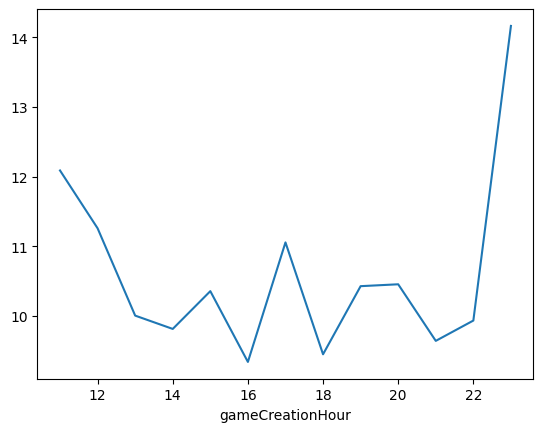

In [173]:
queue_time_per_hour = df.loc[filt, ["gameCreationHour", "timeBetweenGames"]]

# queue_time_per_hour["timeBetweenGames"] = pd.to_timedelta(queue_time_per_hour["timeBetweenGames"])
# queue_time_per_hour
(queue_time_per_hour.groupby("gameCreationHour")["timeBetweenGames"].mean().dt.total_seconds() / 60).plot()

In [174]:
filt = (df["gameCreationHour"] == 23) & (df["timeBetweenGames"] < pd.Timedelta(minutes=30))
df.loc[filt, "timeBetweenGames"].mean()

Timedelta('0 days 00:14:09.750000')